<a href="https://colab.research.google.com/github/number1angel/tphotel/blob/juli/Final_Pav%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [3]:
# Cargar los datos desde el archivo CSV
hotel_data = pd.read_csv('hotel_bookings_demand_TF.csv')

In [4]:
# Mostrar las primeras filas del dataset para entender su estructura
print("Primeras 5 filas del dataset:")
pd.set_option('display.max_columns', None)
hotel_data.head()

Primeras 5 filas del dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342.0,2015.0,July,NaN,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737.0,2015.0,July,27.0,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7.0,2015.0,July,27.0,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13.0,2015.0,July,27.0,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14.0,2015.0,July,27.0,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Mostrar información sobre el dataset
print("\nInformación del dataset:")
hotel_data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       115809 non-null  float64
 3   arrival_date_year               113421 non-null  float64
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        107451 non-null  float64
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int

In [6]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
hotel_data.describe()


Estadísticas descriptivas:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,115809.000000,113421.000000,107451.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,103.994327,2016.157272,27.160455,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.872691,0.707472,13.593478,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
hotel_data.isnull().sum()


Valores nulos por columna:


,0
hotel,0
is_canceled,0
lead_time,3581
arrival_date_year,5969
arrival_date_month,0
arrival_date_week_number,11939
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:
# 3. Porcentaje de cancelacion
porcentaje_cancelacion = hotel_data['is_canceled'].mean() * 100
print(f"\nPorcentaje de cancelacion: {porcentaje_cancelacion:.2f}%")


Porcentaje de cancelacion: 37.04%


In [9]:
# 4. ¿Cuáles son las columnas disponibles en el dataset?
columnas = hotel_data.columns
print("\nColumnas disponibles:")
print(list(columnas))


Columnas disponibles:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


/tmp/ipython-input-10-1059339351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color


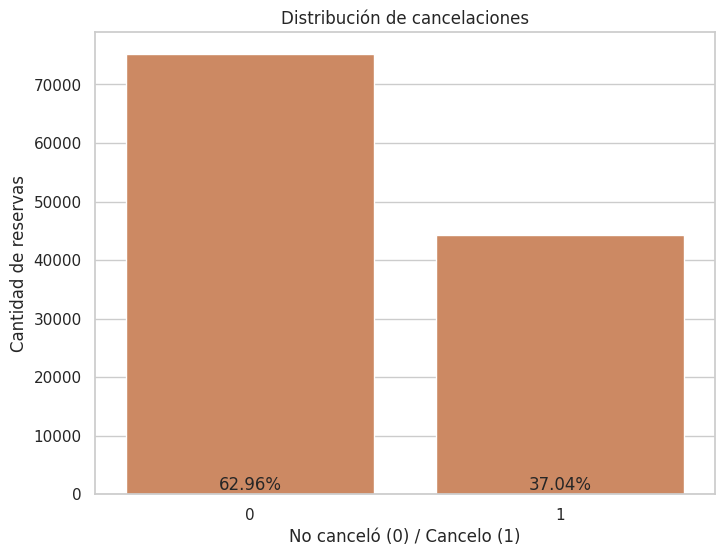

In [10]:
# Calculo del porcentaje
percentage = hotel_data['is_canceled'].value_counts(normalize=True) * 100

# Gráfico de conteo de cancelaciones
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color
sns.countplot(x='is_canceled', data=hotel_data)
plt.title('Distribución de cancelaciones')
plt.xlabel('No canceló (0) / Cancelo (1)')
plt.ylabel('Cantidad de reservas')

# Mostrar el porcentaje
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [11]:
#para el analisis de datos dejar el country, agent y company

In [12]:
#arrival, realizar analisis de datos lupe

In [13]:
hotel_data = hotel_data.drop(['arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',	'arrival_date_day_of_month'], axis=1)

In [14]:
hotel_data = hotel_data.drop(['babies'], axis=1)

In [15]:
hotel_data = hotel_data.drop(['country'], axis=1)

In [16]:
hotel_data = hotel_data.drop(['meal'], axis=1)

In [17]:
hotel_data = hotel_data.drop(['assigned_room_type'], axis=1)

In [18]:
hotel_data = hotel_data.drop(['reservation_status'], axis=1)

In [19]:
hotel_data = hotel_data.drop(['company', 'agent'], axis=1)

In [20]:
hotel_data = hotel_data.drop(['required_car_parking_spaces','reservation_status_date'], axis=1)

In [21]:
# Basandonos en la informacion sobre el dataset, agrupar las variables categoricas en una lista
categorical_columns_semantics = [
  'hotel',
  'is_canceled',
  'market_segment',
  'distribution_channel',
  'is_repeated_guest',
  'reserved_room_type',
  'deposit_type'
  ]

# Convertir las variables en objects
for column in categorical_columns_semantics:
  if column in hotel_data.columns:
    hotel_data[column] = hotel_data[column].astype(str)

# Verificar
hotel_data.dtypes

,0
hotel,object
is_canceled,object
lead_time,float64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
market_segment,object
distribution_channel,object
is_repeated_guest,object


In [22]:
# Obtener la estadistica descriptiva de las variables numericas
hotel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,115809.0,103.994327,106.872691,0.00,18.00,69.000,160.0,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
days_in_waiting_list,119390.0,2.321149,17.594721,0.00,0.00,0.000,0.0,391.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0


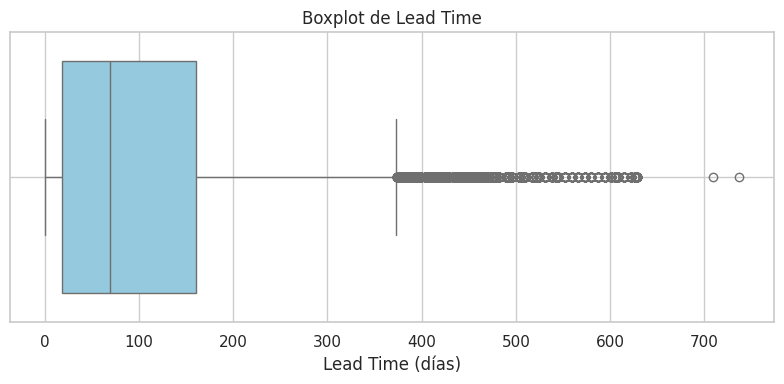

In [23]:
# Vemos una diferencia entre la media y la mediana, asi que hacemos un grafico de caja para observar la distribucion
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['lead_time'], color="skyblue")
plt.title('Boxplot de Lead Time')
plt.xlabel('Lead Time (días)')
plt.grid(True)
plt.tight_layout()
plt.show()

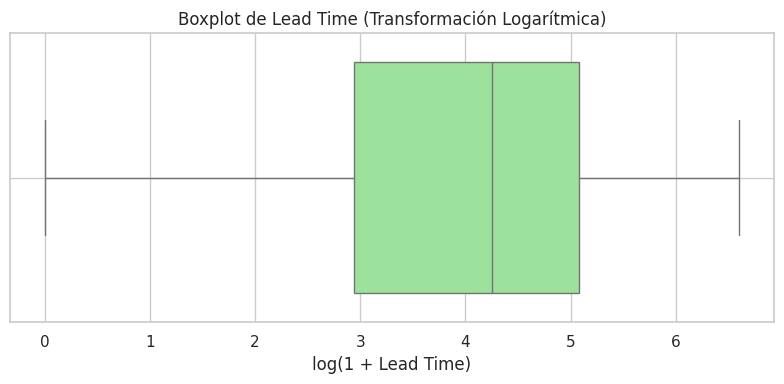

In [24]:
# Aplicar transformación logarítmica (suma 1 para evitar log(0))
hotel_data['lead_time'] = np.log1p(hotel_data['lead_time'])

# Boxplot de la columna transformada
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['lead_time'], color="lightgreen")
plt.title('Boxplot de Lead Time (Transformación Logarítmica)')
plt.xlabel('log(1 + Lead Time)')
plt.grid(True)
plt.tight_layout()
plt.show()

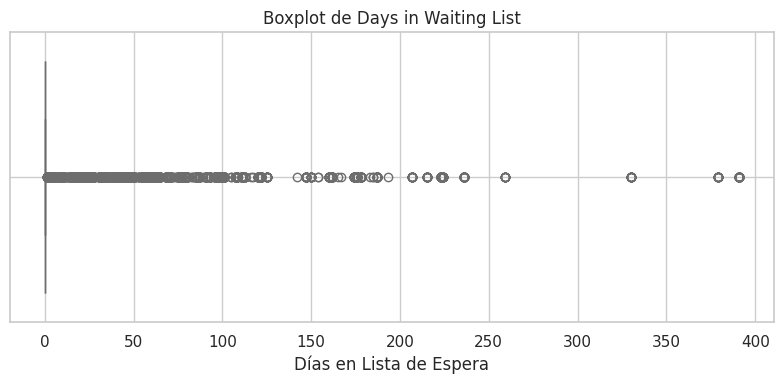

In [25]:
#Al igual que en lead time, vemos la distribucion de los días en lista de espera
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['days_in_waiting_list'], color="salmon")
plt.title('Boxplot de Days in Waiting List')
plt.xlabel('Días en Lista de Espera')
plt.grid(True)
plt.tight_layout()
plt.show()

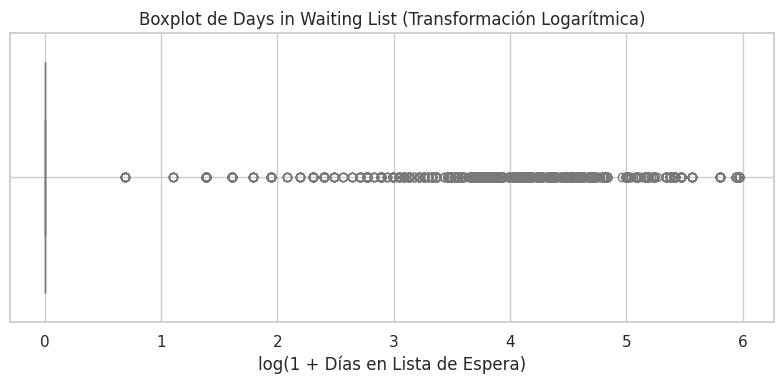

In [26]:
# Aplicar transformación logarítmica: log(1 + x)
hotel_data['days_in_waiting_list'] = np.log1p(hotel_data['days_in_waiting_list'])

# Boxplot de la columna transformada
plt.figure(figsize=(8, 4))
sns.boxplot(x=hotel_data['days_in_waiting_list'], color="lightblue")
plt.title('Boxplot de Days in Waiting List (Transformación Logarítmica)')
plt.xlabel('log(1 + Días en Lista de Espera)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
hotel_data = hotel_data.drop(['days_in_waiting_list'], axis=1)

In [28]:
# Lista de variables numéricas a normalizar logarítmicamente (excepto lead_time)
variables_a_log = [
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'adr',
  'total_of_special_requests'
]

# Aplicar log1p (log(1 + x)) a cada variable
for col in variables_a_log:
  hotel_data[col] = np.log1p(hotel_data[col])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
columnas = hotel_data.columns
print("\nColumnas disponibles:")
print(list(columnas))


Columnas disponibles:
['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr', 'total_of_special_requests']


In [30]:
# Analizamos datos inconsistentes
# Se pueden agregar topes para categorias como niños en 7 o más
noisy_data = {
  'lead_time': hotel_data[hotel_data['lead_time'] < 0],
  'stays_in_weekend_nights': hotel_data[hotel_data['stays_in_weekend_nights'] < 0],
  'stays_in_week_nights': hotel_data[hotel_data['stays_in_week_nights'] < 0],
  'adults': hotel_data[hotel_data['adults'] <= 0], #rever
  'children': hotel_data[hotel_data['children'] < 0],
  'previous_cancellations': hotel_data[hotel_data['previous_cancellations'] < 0],
  'previous_bookings_not_canceled': hotel_data[hotel_data['previous_bookings_not_canceled'] < 0],
  'booking_changes': hotel_data[hotel_data['booking_changes'] < 0],
  'total_of_special_requests': hotel_data[hotel_data['total_of_special_requests'] < 0],
  'adr': hotel_data[hotel_data['adr'] < 0]
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count



{'lead_time': 0,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 0,
 'adults': 403,
 'children': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'booking_changes': 0,
 'total_of_special_requests': 0,
 'adr': 0}

In [31]:
# Elimina las 403 filas con valores negativos o iguales a 0
hotel_data = hotel_data[hotel_data['adults'] > 0]

In [32]:
# Chequeamos haber sacado todo
noisy_data = {
  'lead_time': hotel_data[hotel_data['lead_time'] < 0],
  'stays_in_weekend_nights': hotel_data[hotel_data['stays_in_weekend_nights'] < 0],
  'stays_in_week_nights': hotel_data[hotel_data['stays_in_week_nights'] < 0],
  'adults': hotel_data[hotel_data['adults'] <= 0], #rever
  'children': hotel_data[hotel_data['children'] < 0],
  'previous_cancellations': hotel_data[hotel_data['previous_cancellations'] < 0],
  'previous_bookings_not_canceled': hotel_data[hotel_data['previous_bookings_not_canceled'] < 0],
  'booking_changes': hotel_data[hotel_data['booking_changes'] < 0],
  'total_of_special_requests': hotel_data[hotel_data['total_of_special_requests'] < 0],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count


{'lead_time': 0,
 'stays_in_weekend_nights': 0,
 'stays_in_week_nights': 0,
 'adults': 0,
 'children': 0,
 'previous_cancellations': 0,
 'previous_bookings_not_canceled': 0,
 'booking_changes': 0,
 'total_of_special_requests': 0}

In [33]:
#Terminadas las variables ordinales pasamos a las nominales

In [34]:
columnas = hotel_data.columns
print("\nColumnas disponibles:")
print(list(columnas))


Columnas disponibles:
['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr', 'total_of_special_requests']


In [35]:
# One-hot encoding en columnas especificas
one_hot_cols = ['hotel', 'market_segment', 'distribution_channel', 'is_repeated_guest','reserved_room_type', 'deposit_type', 'customer_type']
hotel_data = pd.get_dummies(hotel_data, columns=one_hot_cols, drop_first=True)

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118987 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118987 non-null  object 
 1   lead_time                       115424 non-null  float64
 2   stays_in_weekend_nights         118987 non-null  float64
 3   stays_in_week_nights            118987 non-null  float64
 4   adults                          118987 non-null  float64
 5   children                        118983 non-null  float64
 6   previous_cancellations          118987 non-null  float64
 7   previous_bookings_not_canceled  118987 non-null  float64
 8   booking_changes                 118987 non-null  float64
 9   adr                             118986 non-null  float64
 10  total_of_special_requests       118987 non-null  float64
 11  hotel_Resort Hotel              118987 non-null  bool   
 12  market_segment_Comple

/tmp/ipython-input-36-3139350907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color


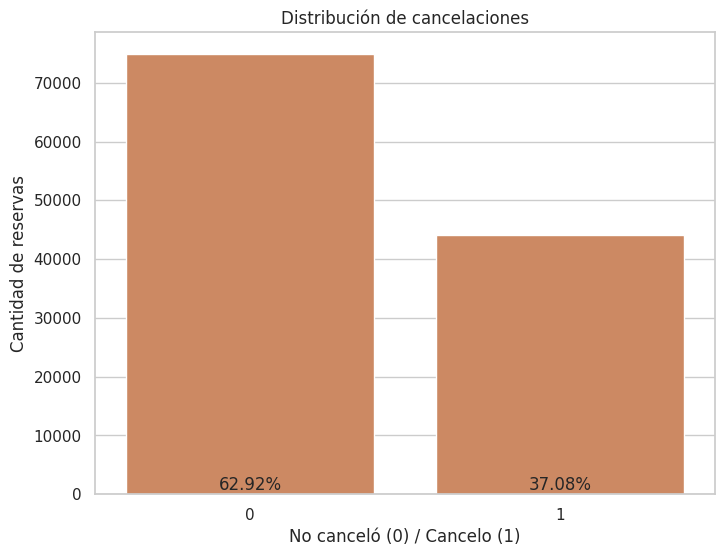

In [36]:
# Calculo del porcentaje nuevo
percentage = hotel_data['is_canceled'].value_counts(normalize=True) * 100

# Gráfico de conteo de cancelaciones nuevas
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['orange', 'lightgreen']) #corregir color
sns.countplot(x='is_canceled', data=hotel_data)
plt.title('Distribución de cancelaciones')
plt.xlabel('No canceló (0) / Cancelo (1)')
plt.ylabel('Cantidad de reservas')

# Mostrar el porcentaje nuevo
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [37]:
# Inspeccionar valores faltantes por columna
missing_values = hotel_data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
lead_time    3563
children        4
adr             1
dtype: int64


In [38]:
# Imputar NaN con mediana en las 3 variables
hotel_data['lead_time'] = hotel_data['lead_time'].fillna(hotel_data['lead_time'].median())
hotel_data['children'] = hotel_data['children'].fillna(hotel_data['children'].median())
hotel_data['adr'] = hotel_data['adr'].fillna(hotel_data['adr'].median())

# Comprobar que no queden más NaN en esas columnas
print(hotel_data[['lead_time', 'children', 'adr']].isnull().sum())

lead_time    0
children     0
adr          0
dtype: int64


In [39]:
# Definir la variable objetivo y las características
y = hotel_data['is_canceled']  # Variable objetivo
X = hotel_data.drop(['is_canceled'], axis=1)  # Características

print("Dimensiones de las características (X):", X.shape)
print("Dimensiones de la variable objetivo (y):", y.shape)

Dimensiones de las características (X): (118987, 36)
Dimensiones de la variable objetivo (y): (118987,)


In [40]:
# Dividir los datos en conjuntos de entrenamiento y prueba (20% y 80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (95189, 36)
Dimensiones de X_test: (23798, 36)
Dimensiones de y_train: (95189,)
Dimensiones de y_test: (23798,)


#### Regresión Logística

**Modelo 1   {0.73       0.79 }**

#### **1. Eliminar columnas que filtran el resultado (LEAKAGE)**

In [100]:
columnas_a_eliminar = ['reservation_status', 'reservation_status_date',]
for col in columnas_a_eliminar:
    if col in hotel_data.columns:
        hotel_data.drop(columns=col, inplace=True)

####**2. Eliminar valores extremos que pueden engañar (outliers)**

In [101]:
hotel_data = hotel_data[(hotel_data['adr'] < 500) & (hotel_data['lead_time'] < 600)]

Filtra filas donde:

*   ***adr*** (precio promedio por noche) > 500
*   ***lead_time*** (anticipación de la reserva) > 600 días

Esos valores son atípicos y pueden confundir al modelo.

#### **3. Separar variables predictoras y la variable objetivo**

In [102]:
X = hotel_data.drop(columns='is_canceled')
y = hotel_data['is_canceled']

* ***X:*** contiene todas las variables independientes (los datos con los que vamos a predecir).

* ***y:*** contiene la variable dependiente, el resultado a predecir (cancelado = 1, no cancelado = 0).

#### **4. Detectar tipos de variables (columnas numéricas y categóricas)**

In [103]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

* ***num_cols:*** lista de columnas numéricas.
* ***cat_cols:*** lista de columnas categóricas (texto, como "hotel", "meal", etc).

Es importante para tratarlas distinto en el preprocesamiento.

#### **5. Crear pipelines de preprocesamiento**

**Pipeline para columnas numéricas**

In [104]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

* ***SimpleImputer:*** rellena los valores faltantes con la mediana.

* ***StandardScaler:*** transforma los números para que tengan media 0 y desvío estándar 1 (escala estándar). Esto mejora el rendimiento de muchos modelos.


**Pipeline para columnas categóricas:**

In [105]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

* Rellena valores faltantes con la **categoría más frecuente.**
* Convierte texto a columnas binarias (0 o 1) con OneHotEncoder.

Si una columna es binaria, deja una sola columna (drop='if_binary') para no duplicar información.



**Unir ambos pipelines:**

In [106]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

Esto le dice al modelo:
“Cuando veas datos, procesá las columnas numéricas con este pipeline, y las categóricas con este otro.”



#### **6. Dividir en conjunto de entrenamiento y test**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)

* ***stratify=y:*** mantiene la proporción de cancelaciones en ambos conjuntos.
* ***test_size=0.25:*** el 25% de los datos se usa para probar el modelo.
* ***random_state=0:*** asegura que siempre obtengas el mismo corte.

#### **7. Definir el modelo completo como pipeline**

In [109]:
modelo = Pipeline([
    ('preprocesamiento', preprocessor),
    ('clasificador', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
])

#Entrenar el modelo
modelo.fit(X_train, y_train) #Acá el modelo aprende a partir de los datos de entrenamiento.

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('clasificador',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=0))])

Esto conecta todo:
* ***preprocesamiento:*** transforma los datos.
* ***clasificador:*** aplica la regresión logística.
* ***max_iter=1000:*** permite más iteraciones para asegurar que converge.
* ***class_weight='balanced':*** ajusta el peso de las clases para no ignorar la clase minoritaria (cancelaciones).
* ***random_state=0:*** hace reproducible el resultado.

#### **8. Hacer predicciones.**

In [110]:
y_pred = modelo.predict(X_test)

El modelo ahora predice si se canceló o no sobre los datos de test que nunca vio antes.

#### **9. Calcular métricas de evaluación**

In [111]:
acc = accuracy_score(y_test, y_pred)
reporte_dict = classification_report(y_test, y_pred, output_dict=True)
reporte_texto = classification_report(y_test, y_pred)

* ***accuracy_score:*** mide el porcentaje total de aciertos.
* ***classification_report:*** muestra precision, recall y f1-score para cada clase.

#### **11. Mostrar resultados**

In [112]:
# 1. Mostrar Accuracy y F1 con emojis
print(f"📊 Accuracy: {acc:.4f}")

# 2. Reporte de Clasificación completo
print("=== 🧾 Reporte de Clasificación ===\n")
print(reporte_texto)


📊 Accuracy: 0.8118
=== 🧾 Reporte de Clasificación ===

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     18236
           1       0.73      0.79      0.76     10680

    accuracy                           0.81     28916
   macro avg       0.80      0.81      0.80     28916
weighted avg       0.82      0.81      0.81     28916



### **12. Mostrar la matriz de confusión**

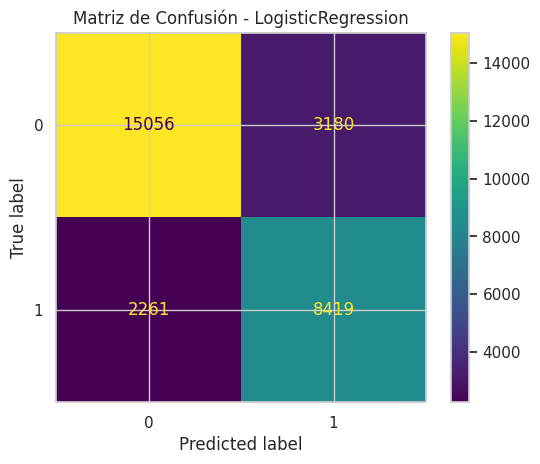

In [113]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Matriz de Confusión - LogisticRegression")
plt.show()

* La matriz de confusión muestra:
Verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

* Permite visualizar cuántas veces acertó el modelo y dónde se equivoca.

**Modelo 2     {0.70      0.74}**

In [91]:
# 1. Definir variable objetivo y quitar columnas problemáticas
y = hotel_data['is_canceled']
X = hotel_data.drop(columns=[
    'is_canceled',
    'reservation_status',        # contiene la respuesta
    'reservation_status_date',   # contiene la fecha real de cancelación
    'company',                   # muchas ausencias
    'agent',                     # miles de valores únicos
    'country'                    # demasiado dispersa
], errors='ignore')

In [92]:
# 2. Separar columnas numéricas y categóricas
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [93]:
# 3. Preparar transformadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [94]:
# 4. Crear pipeline con regresión logística balanceada
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, class_weight='balanced'))
])

In [95]:
# 5. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [96]:
# 6. Entrenar el modelo y hacer predicciones
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     14589
           1       0.70      0.74      0.72      8544

    accuracy                           0.79     23133
   macro avg       0.77      0.78      0.78     23133
weighted avg       0.79      0.79      0.79     23133


=== Matriz de Confusión ===
[[11881  2708]
 [ 2189  6355]]


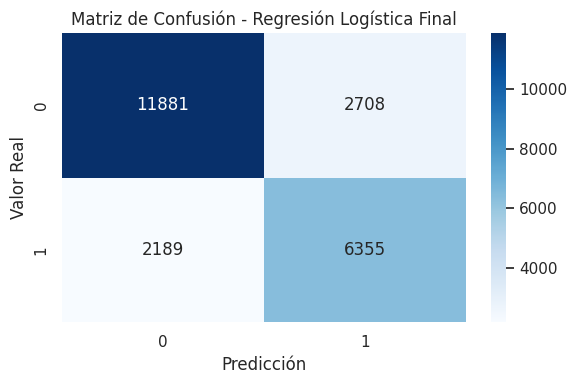

In [99]:
# 7. Evaluación
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred, digits=2))

print("\n=== Matriz de Confusión ===")
print(confusion_matrix(y_test, y_pred))
# 📊 9. Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Logística Final")
plt.tight_layout()
plt.show()

Random Forest

In [ ]:
# Inicializar los modelos
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenar los modelos con los datos de entrenamiento

random_forest_model.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
random_forest_predictions = random_forest_model.predict(X_test)

# Calcular la precisión de cada modelo
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Mostrar los resultados
print(f"Precisión del Bosque Aleatorio: {random_forest_accuracy:.4f}")

Decisional Tree

In [ ]:
# Inicializar los modelos
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar los modelos con los datos de entrenamiento
decision_tree_model.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calcular la precisión de cada modelo
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

# Mostrar los resultados
print(f"Precisión del Árbol de Decisión: {decision_tree_accuracy:.4f}")

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Función para graficar la matriz de confusión."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No comestible', 'Comestible'],
                yticklabels=['No comestible', 'Comestible'])
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

# Hacer predicciones (si no las hiciste en el paso anterior)
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calcular y graficar la matriz de confusión para cada modelo
plot_confusion_matrix(y_test, logistic_predictions, 'Regresión Logística')
plot_confusion_matrix(y_test, random_forest_predictions, 'Bosque Aleatorio')
plot_confusion_matrix(y_test, decision_tree_predictions, 'Árbol de Decisión')

In [ ]:
# Análisis de correlación
plt.figure(figsize=(12, 10))
# Seleccionamos columnas numéricas (incluyendo las creadas por get_dummies) para la matriz de correlación
# Los tipos comunes para las columnas dummy son 'uint8' o 'bool'
numeric_cols = hotel_data.select_dtypes(include=['int64', 'float64', 'uint8', 'bool']).columns
correlation = hotel_data[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()